In [991]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, joblib
from IPython.display import display

In [992]:
model = joblib.load('../artifacts/bestModel.pkl')
df = joblib.load('../artifacts/data.pkl')
coef = joblib.load('../artifacts/coef.pkl')
intercept = joblib.load('../artifacts/intercept.pkl')

In [993]:
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,...,INSTM_PAYMENT_DIFF_MIN_woe,INSTM_PAYMENT_DIFF_MAX_woe,INSTM_PAYMENT_RATIO_STD_woe,INSTM_IS_LATE_SUM_woe,INSTM_IS_EARLY_SUM_woe,INSTM_IS_OVERPAY_SUM_woe,INSTM_IS_MISSED_SUM_woe,SK_ID_CURR,TARGET,PD
0,0.036202,0.250941,0.014724,0.188771,0.111466,0.213833,-0.037978,0.298054,0.011871,0.154966,...,0.036775,-0.044722,0.127920,0.189795,-0.063673,-0.046019,-0.01631,100002,1,0.851064
1,0.036202,-0.154315,-0.080369,-0.362672,-0.439432,-0.071234,-0.037978,-0.265930,-0.043154,-0.332558,...,0.036775,-0.044722,0.127920,0.189795,0.035346,-0.046019,-0.01631,100003,0,0.157916
2,-0.415030,0.250941,0.014724,0.188771,0.111466,0.213833,-0.037978,0.298054,-0.043154,-0.156375,...,0.036775,-0.044722,0.127920,0.189795,-0.173362,-0.046019,-0.01631,100004,0,0.223813
3,0.036202,-0.154315,0.014724,0.188771,0.111466,0.229315,-0.037978,0.298054,0.011871,0.154966,...,0.036775,-0.044722,0.127920,0.189795,-0.063673,-0.046019,-0.01631,100006,0,0.418342
4,0.036202,0.250941,0.014724,0.188771,0.111466,0.213833,-0.037978,-0.265930,0.003832,-0.170278,...,-0.159709,-0.044722,-0.115678,-0.203037,0.204516,-0.046019,-0.01631,100007,0,0.540706


In [994]:
X = df.drop(columns=['TARGET', 'SK_ID_CURR','PD'])
df['PD'] = model.predict_proba(X)[:, 1]

In [995]:
f = pd.read_csv("../../data/modelTable.csv")
name = f.columns.tolist()
name

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'FLA

In [996]:
df.columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'EXT_SOURCE_2_woe',
 'EXT_SOURCE_3_woe',
 'DAYS_BIRTH_woe',
 'DAYS_EMPLOYED_woe',
 'AMT_CREDIT_woe',
 'AMT_INCOME_TOTAL_woe',
 'BUREAU_DAYS_CREDIT_MIN_woe',
 'BUREAU_DAYS_CREDIT_MAX_woe',
 'BUREAU_DAYS_CREDIT_MEAN_woe',
 'BUREAU_DAYS_CREDIT_ENDDATE_MEAN_woe',
 'BUREAU_AMT_CREDIT_SUM_SUM_woe',
 'BUREAU_AMT_CREDIT_SUM_MEAN_woe',
 'BUREAU_AMT_CREDIT_SUM_DEBT_SUM_woe',
 'BUREAU_AMT_CREDIT_SUM_DEBT_MEAN_woe',
 'BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM_woe',
 'BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN_woe',
 'BUREAU_DEBT_CREDIT_RATIO_MEAN_woe',
 'BUREAU_IS_ACTIVE_SUM_woe',
 'BUREAU_IS_CLOSED_SUM_woe',
 'BUREAU_IS_SOLD_

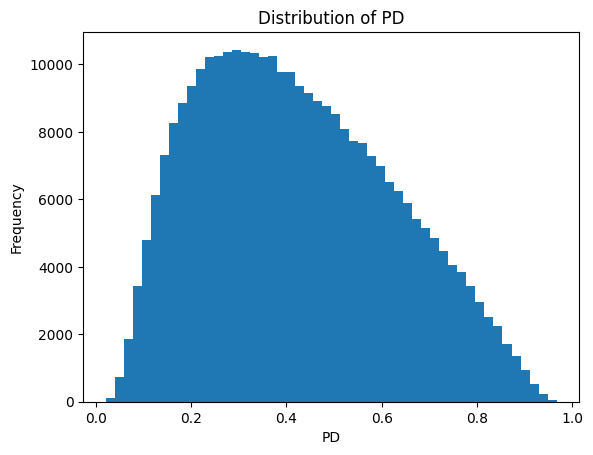

In [997]:
# the number of rows in the >10% bin are too largh let's check
plt.figure()
plt.hist(seg['PD'], bins=50)
plt.title('Distribution of PD')
plt.xlabel('PD')
plt.ylabel('Frequency')
plt.show()

<span style="font-size:30px; font-family:'Times new roman'; font-weight:bold">
Model Calibration🪵
</span>

<span style="font-size:15px; font-family:'Times new roman'">
Model‐level calibration<br>
Adjusting raw logistic outputs (to correct for class_weight='balanced' in logistic regression) so it become true PIT PDs<br>
This must happen before any segmentation, because i want my buckets built on probabilities <br>that actually reflect a 12-month default rate<br>
<br>
!! probabilities from logistic model tell how likely one borrower is to default relative to the <br>others in training set, but they don’t automatically match the real‐world <br>default frequency<br>
<br>
Raw PD from Regression Models often closer to TTC A typical regression model trained on historical data might produce PDs that are <br>
somewhat TTC --> TTC PDs aim to reflect the average default risk of a borrower over a full economic cycle, smoothing out short-term <br>
fluctuations due to economic booms or busts. They are more stable and less reactive to current economic conditions<br>
<br>
PIT PD on the other hand, reflect the current economic conditions and the specific risk profile of an obligor at a given moment in time<br> They are more sensitive to macroeconomic factors and tend to move with the economic cycle. A 12-month PIT PD specifically estimates the likelihood of default over the next 12 months,<br> considering the current and expected economic environment.
<span>

In [998]:
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV


<span style="font-size:15px; font-family:'Times new roman'">
Why isotonic over simpler methods❓<br>
Automatic boundary handling: By clipping out-of-range inputs, you guarantee every raw PD or extreme ones gets a valid calibrated PD.<br>
<br>
Transparency: The fitted mapping is easy to visualize (a step function) and explain to auditors<br>
<br>
But for most credit risk pipelines especially when you have hundreds or thousands of calibration points <br>IsotonicRegression(out_of_bounds='clip') strikes the best balance between <br>flexibility and robustness
<span>

In [999]:
rawPD = model.predict_proba(X)[:, 1]
y = df['TARGET'].values

In [1000]:
# then I gonna calculate 12-months PIT PDs by using isotonic regression
# fit an isotonic regressor to calibrate raw PD --> 12m PD
iso = IsotonicRegression(out_of_bounds='clip')
iso.fit(rawPD, y)

,y_min,None
,y_max,None
,increasing,True
,out_of_bounds,'clip'


In [1001]:
# apply the calibrated mapping to all observations
pitPD = iso.predict(rawPD)

df['PIT_PD'] = pitPD

In [1002]:
# evaluate calibration quality
brier = brier_score_loss(y, iso.predict(rawPD))
print(f'Brier score on calibration set: {brier:.4f}')

Brier score on calibration set: 0.0685


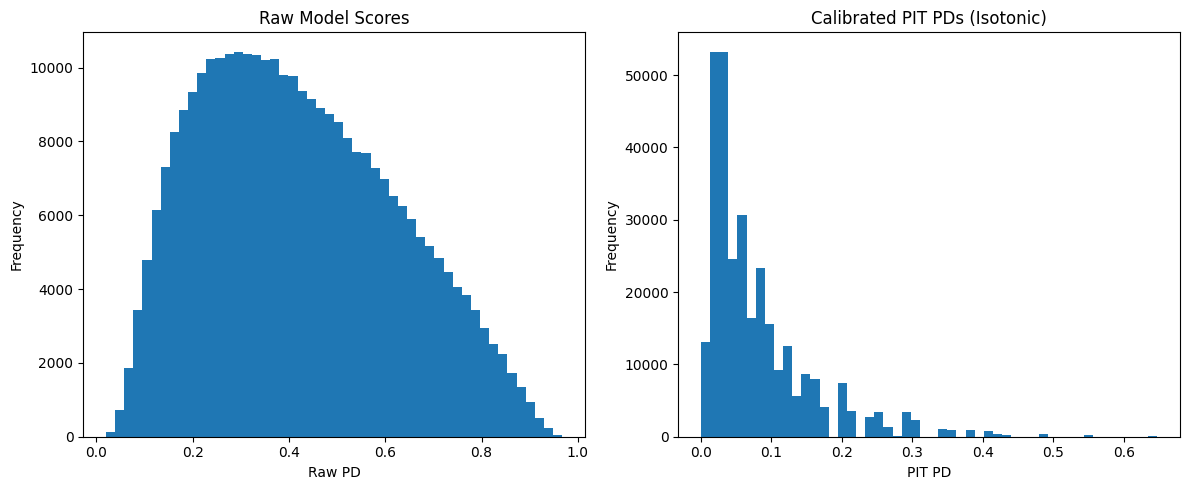

In [1003]:
# before --> after
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(rawPD, bins=50)
plt.title('Raw Model Scores')
plt.xlabel('Raw PD')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(pitPD, bins=50)
plt.title('Calibrated PIT PDs (Isotonic)')
plt.xlabel('PIT PD')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<span style="font-size:30px; font-family:'Times new roman'; font-weight:bold">
Segmentation 🪵
</span>

<span style="font-size:15px; font-family:'Times new roman'">
Group to rating grades so i can estimate stable default rates at the grade level --> not individual<br>
therefore, first problem is --> how to defind the cut-off each level!!
<span>

<span style="font-size:15px; font-family:'Times new roman'">
IFRS9 Two-layers segmantation approch<br>
- Portfolio level --> features that share similar credit risk characteristics<br>
- Risk grade level --> group by level of calculated PD<br>
<br>
# of buckets
5 might groups balance granularity against having enough defaults in each bucket to observe actual<br>default rates over calibration window --> not too small and too large
<span>

<span style="font-size:15px; font-family:'Times new roman'">
Stage 1: PD bucket’s 12-month PD ≤ X % and no other SICR triggers<br>
Stage 2: PD bucket’s 12-month PD > X % (e.g. >1 %) or other SICR indicators<br>
Stage 3: default status<br>
<span>

In [1004]:
base = df[["SK_ID_CURR", "TARGET", "PD", 'PIT_PD']]
base.shape

(307511, 4)

In [1005]:
info = f[['SK_ID_CURR', 
'NAME_CONTRACT_TYPE', 
'NAME_INCOME_TYPE', 
'FLAG_OWN_REALTY', # secure | unsecure
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS']]
info.shape

(307511, 6)

In [1006]:
seg = pd.merge(
    base,
    info,
    on="SK_ID_CURR",
    how="left"
)
seg.shape
seg.head()

,SK_ID_CURR,TARGET,PD,PIT_PD,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS
0,100002,1,0.851064,0.305873,Cash loans,Working,1,Secondary / secondary special,Single / not married
1,100003,0,0.157916,0.018697,Cash loans,State servant,0,Higher education,Married
2,100004,0,0.223813,0.024359,Revolving loans,Working,1,Secondary / secondary special,Single / not married
3,100006,0,0.418342,0.063131,Cash loans,Working,1,Secondary / secondary special,Civil marriage
4,100007,0,0.540706,0.094554,Cash loans,Working,1,Secondary / secondary special,Single / not married


In [1007]:
seg["portfolio"] = (
      seg["NAME_CONTRACT_TYPE"].astype(str) + "_"
    + seg["NAME_INCOME_TYPE"].astype(str) + "_"
    + seg["FLAG_OWN_REALTY"].map({1:"Secured",0:"Unsecured"}) + "_"
    + seg["NAME_EDUCATION_TYPE"].astype(str) + "_"
    + seg["NAME_FAMILY_STATUS"].astype(str)
)

In [1008]:
seg.head()

,SK_ID_CURR,TARGET,PD,PIT_PD,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,portfolio
0,100002,1,0.851064,0.305873,Cash loans,Working,1,Secondary / secondary special,Single / not married,Cash loans_Working_Secured_Secondary / seconda...
1,100003,0,0.157916,0.018697,Cash loans,State servant,0,Higher education,Married,Cash loans_State servant_Unsecured_Higher educ...
2,100004,0,0.223813,0.024359,Revolving loans,Working,1,Secondary / secondary special,Single / not married,Revolving loans_Working_Secured_Secondary / se...
3,100006,0,0.418342,0.063131,Cash loans,Working,1,Secondary / secondary special,Civil marriage,Cash loans_Working_Secured_Secondary / seconda...
4,100007,0,0.540706,0.094554,Cash loans,Working,1,Secondary / secondary special,Single / not married,Cash loans_Working_Secured_Secondary / seconda...


<span style="font-size:20px; font-family:'Times new roman'; font-weight:bold">
Traditional way --> 5 Equal Counts
<span>

In [1009]:
# def assign_pd_buckets(x, n):
#     # maximum possible buckets
#     max_q = min(n, x.size, x.nunique())
#     if max_q <= 1:
#         # If there’s only one unique value or group is too small --> I put that row in first bucket
#         return pd.Series(['1'] * len(x), index=x.index)
#     labels = [f'{i+1}' for i in range(max_q)]
#     # pd.qcut splits each portfolio’s PD distribution into equal-sized group
#     return pd.qcut(x, q=max_q, labels=labels, duplicates='drop')

In [1010]:
# n = 5 # # of buckets --> bucketing is a common way to discretize a continuous PD distribution 
# # into roughly equal sized groups for PD calibration
# seg['PDbyBucket'] = (
#     seg
#     .groupby('portfolio')['PD']
#     .transform(lambda grp: assign_pd_buckets(grp, n))
# )

In [1011]:
# seg.head()

In [1012]:
# bucketStat = (
#     seg
#     .groupby(['portfolio', 'PDbyBucket'])
#     .agg(
#         exposures=('SK_ID_CURR', 'nunique'),
#         # sum of defaults
#         defaults =('TARGET', 'sum'),
#         # average model PD
#         meanPD   =('PD', 'mean'),
#     )
#     .assign(defaultRate=lambda df: df['defaults'] / df['exposures'])
#     .reset_index()
# )

In [1013]:
# bucketStat.iloc[1000:1100, :]

In [1014]:
# bucketStat[bucketStat["defaultRate"] != 0].shape

In [1015]:
# zero = (bucketStat['defaultRate'] == 0).sum()
# nonzero = (bucketStat['defaultRate'] > 0).sum()

# print(f"{zero} buckets have 0% defaults")
# print(f"{nonzero} buckets have >0% defaults")

<span style="font-size:15px; font-family:'Times new roman'">
Why so many zeros❓<br>
Small buckets<br>
If a bucket only has, say, 10 exposures, the default rate can only be 0%, 10%, 20%, <br>
… 100%. With low-loss portfolios you’ll often hit 0%.<br>
<br>
Sparse defaults<br>
In a well-behaved retail book default rates might be 1% or less. If you slice that 1% uniformly into 5 <br>buckets, several buckets will see zero defaults just by chance.<br>
<span>

<span style="font-size:20px; font-family:'Times new roman'; font-weight:bold">
IFRS9 Perference --> Threshold Buckets(Fixed Ranges)
<span>

<span style="font-size:15px; font-family:'Times new roman'">
Under IFRS 9, segmentation is not meant to be a purely statistical exercise, but rather a risk-driven,<br> judgmental process<br>
<br>
Threshold-based PD buckets tied to your internal rating scale<br>
    - align PD bands to the way credit-risk function actually views risk --> internal reg<br>grades or risk appetite<br>
<br>
like doing down specify the clear cutoff<br>
these cutoff make segmentation more transparent to auditors and ensures each bucket maps <br>to established risk tolerances<br>
<br>
Ensure homogeneity and sufficient data in each segment<br>
IFRS 9 requires that each segment is “homogeneous,” i.e. exposures in a segment share similar risk <br>characteristics and respond similarly to economic scenarios.<br>
<br>
It also requires enough observations in each segment so that bank observed default rates (and <br> ECL) are credible. If a bucket ends up with too few exposures or no defaults,<br> bank should consider merging it with an adjacent bucket<br>
<br>
Within each segment, apply economic scenarios and macro overlays to get 12-month or lifetime ECL
<span>

In [1016]:
# minimum observation per segment of IFRS9 
# --> in each bucket at least 30 row in it (in the high threshold bucket if the bucket 
# have not enough data merge with the lower levels) 
n = 5 # number of buckets (global bucket for small unique exposture (> 30))
minExposures = 30
pCount = seg['portfolio'].value_counts()  # exposure counts per portfolio

In [1017]:
# define PD threshold bins and labels
# [0-1%), [1-2%) and so on
bins = [-float('inf'), 0.01, 0.02, 0.03, 0.05, 0.10, float('inf')]
label = ['<=1%', '1-2%', '2-3%', '3-5%', '5-10%', '>10%']

In [1018]:
gLabel= [f'G{i+1}' for i in range(n)]
gBins = pd.qcut(seg['PIT_PD'], n, retbins=True, duplicates='drop')[1]

In [1019]:
# assign threshold buckets for not in valid
mainSeg = seg['portfolio'].map(pCount) >= minExposures
mainBucket = pd.cut(
    seg.loc[mainSeg, 'PIT_PD'],
    bins=bins,
    labels=label,
    include_lowest=True,
    right=False,
)
seg.loc[mainSeg, 'PDbyBucket'] = mainBucket.fillna(label[0]).astype(str)
seg.loc[mainSeg, 'bucketSource'] = 0

In [1020]:
# assign global quantile buckets for small group
smallSeg = ~mainSeg
smallBucket = pd.cut(
    seg.loc[smallSeg, 'PIT_PD'],
    bins=gBins,
    labels=gLabel,
    include_lowest=True
)

seg.loc[smallSeg, 'PDbyBucket'] = smallBucket.fillna(gLabel[0]).astype(str)
seg.loc[smallSeg, 'bucketSource'] = 1

In [1021]:
seg['PDbyBucket'] = seg['PDbyBucket'].astype(str)
counts = seg['portfolio'].value_counts()
small = counts[counts < minExposures].index.tolist()
seg.loc[seg['portfolio'].isin(small), 'PDbyBucket'] = '1-2%'

In [1022]:
# summarize
bucketStat = (
    seg
      .groupby(['bucketSource', 'portfolio', 'PDbyBucket'])
      .agg(
        exposures=('SK_ID_CURR','nunique'),
        meanPD=('PIT_PD','mean'),
        defaultRate=('TARGET','mean')
      )
      .reset_index()
)

In [1023]:
bucketStat.sort_values(['bucketSource','exposures'], ascending=[True, False]).head(100)

,bucketSource,portfolio,PDbyBucket,exposures,meanPD,defaultRate
613,0.0,Cash loans_Working_Secured_Secondary / seconda...,>10%,16759,0.187822,0.189868
611,0.0,Cash loans_Working_Secured_Secondary / seconda...,5-10%,15255,0.074639,0.073746
711,0.0,Cash loans_Working_Unsecured_Secondary / secon...,>10%,7786,0.189882,0.194066
610,0.0,Cash loans_Working_Secured_Secondary / seconda...,3-5%,7704,0.040083,0.041277
709,0.0,Cash loans_Working_Unsecured_Secondary / secon...,5-10%,7175,0.074859,0.079303
...,...,...,...,...,...,...
188,0.0,Cash loans_Pensioner_Secured_Higher education_...,3-5%,645,0.039412,0.043411
558,0.0,Cash loans_Working_Secured_Incomplete higher_M...,>10%,634,0.189379,0.184543
171,0.0,Cash loans_Commercial associate_Unsecured_Seco...,5-10%,621,0.075621,0.095008
653,0.0,Cash loans_Working_Unsecured_Higher education_...,5-10%,611,0.074612,0.073650


In [1024]:
seg['bucketSource'].astype('Int64')
seg[seg['bucketSource'] == 1].head()

,SK_ID_CURR,TARGET,PD,PIT_PD,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,portfolio,PDbyBucket,bucketSource
1156,101358,0,0.398286,0.054534,Revolving loans,Unemployed,0,Higher education,Single / not married,Revolving loans_Unemployed_Unsecured_Higher ed...,1-2%,1.0
1157,101359,0,0.585332,0.106641,Revolving loans,Commercial associate,0,Incomplete higher,Civil marriage,Revolving loans_Commercial associate_Unsecured...,1-2%,1.0
1341,101575,1,0.484879,0.082890,Revolving loans,Pensioner,0,Lower secondary,Married,Revolving loans_Pensioner_Unsecured_Lower seco...,1-2%,1.0
1602,101877,0,0.359716,0.044433,Cash loans,State servant,0,Incomplete higher,Civil marriage,Cash loans_State servant_Unsecured_Incomplete ...,1-2%,1.0
1751,102046,0,0.178358,0.018697,Revolving loans,Commercial associate,0,Higher education,Separated,Revolving loans_Commercial associate_Unsecured...,1-2%,1.0


In [1025]:
seg[seg['PDbyBucket'] == '>10%'].shape

(78097, 12)

In [1026]:
bucketStat[bucketStat["defaultRate"] > 0].shape

(820, 6)

In [1027]:
seg[seg['TARGET']==1].shape[0]/seg[seg['TARGET']==0].shape[0] # all default = 8%

0.08781828601345662

In [1028]:
# somthing wrong with binning🥹🥹 --> let's check
seg['PDbyBucket'].value_counts().sort_index()

PDbyBucket
1-2%     40549
2-3%     42974
3-5%     54014
5-10%    85864
<=1%      6013
>10%     78097
Name: count, dtype: int64

<span style="font-size:15px; font-family:'Times new roman'">
Fixed PD band segmentation will be skewed --> which raw PD skew 🥹<br>
IFRS 9 are not designed to give equal counts in each group anyway<br> They’re meant to reflect economic “risk bands,” so if portfolio PIT‐PD distribution is concentrated in <br>the 5–10 % range, that bucket will naturally be large, and the low-PD buckets small
<span>

In [1029]:
seg.head()

,SK_ID_CURR,TARGET,PD,PIT_PD,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,portfolio,PDbyBucket,bucketSource
0,100002,1,0.851064,0.305873,Cash loans,Working,1,Secondary / secondary special,Single / not married,Cash loans_Working_Secured_Secondary / seconda...,>10%,0.0
1,100003,0,0.157916,0.018697,Cash loans,State servant,0,Higher education,Married,Cash loans_State servant_Unsecured_Higher educ...,1-2%,0.0
2,100004,0,0.223813,0.024359,Revolving loans,Working,1,Secondary / secondary special,Single / not married,Revolving loans_Working_Secured_Secondary / se...,2-3%,0.0
3,100006,0,0.418342,0.063131,Cash loans,Working,1,Secondary / secondary special,Civil marriage,Cash loans_Working_Secured_Secondary / seconda...,5-10%,0.0
4,100007,0,0.540706,0.094554,Cash loans,Working,1,Secondary / secondary special,Single / not married,Cash loans_Working_Secured_Secondary / seconda...,5-10%,0.0


<span style="font-size:30px; font-family:'Times new roman'; font-weight:bold">
Bucket Calibration --> lifetime PD for IFRS9 staging 2-3🪵
</span>

<span style="font-size:15px; font-family:'Times new roman'">
Why calibration for lifetime PD❓<br>
    - PD accuracy --> meaningful of calculated PDs<br>
    - Regulatory and Risk management --> IFRS9 or Basel need well-calibrated PDs to compute ECL<br>
    - Score Interpretability
<span>

<span style="font-size:px; font-family:'Times new roman'; font-weight:bold">
PIT PD --> calibration again --> TTC PD --> Lifetime PD
</span>

In [1030]:
f.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'FLA

In [1031]:
appTrain = pd.read_csv("../../data/application_train.csv")
prev = pd.read_csv("../../data/previous_application.csv")

In [1032]:
display(appTrain['AMT_ANNUITY'].isnull().sum())
display(appTrain['AMT_CREDIT'].isnull().sum())

np.int64(12)

np.int64(0)

In [1033]:
display(prev.shape)
display(prev.columns.tolist)

(1670214, 37)

<bound method IndexOpsMixin.tolist of Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')>

In [1034]:
prev[['SK_ID_CURR', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].head()

,SK_ID_CURR,DAYS_LAST_DUE,DAYS_TERMINATION
0,271877,-42.0,-37.0
1,108129,365243.0,365243.0
2,122040,365243.0,365243.0
3,176158,-182.0,-177.0
4,202054,NaN,NaN


In [1035]:
for i in ['DAYS_LAST_DUE', 'DAYS_TERMINATION']:
    prev[i] = prev[i].replace(365243.0, np.nan)

In [1036]:
prev[['SK_ID_CURR', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].head()

,SK_ID_CURR,DAYS_LAST_DUE,DAYS_TERMINATION
0,271877,-42.0,-37.0
1,108129,NaN,NaN
2,122040,NaN,NaN
3,176158,-182.0,-177.0
4,202054,NaN,NaN


In [1037]:
prev[['SK_ID_CURR', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].isnull().sum()

SK_ID_CURR               0
DAYS_LAST_DUE       884286
DAYS_TERMINATION    898978
dtype: int64

In [1038]:
# capture most recent overdue or termination
prevAgg = (
  prev
  .groupby('SK_ID_CURR')
  .agg(
    DAYS_LAST_DUE_RECENT=('DAYS_LAST_DUE','max'),
    DAYS_TERMINATION_RECENT=('DAYS_TERMINATION','max')
  )
  .reset_index()
)

In [1039]:
display(prevAgg.shape)
display(prevAgg.isnull().sum())

(338857, 3)

SK_ID_CURR                     0
DAYS_LAST_DUE_RECENT       24935
DAYS_TERMINATION_RECENT    27277
dtype: int64

In [1040]:
life = seg[['SK_ID_CURR', 'PIT_PD', 'TARGET', 'FLAG_OWN_REALTY']]
life

,SK_ID_CURR,PIT_PD,TARGET,FLAG_OWN_REALTY
0,100002,0.305873,1,1
1,100003,0.018697,0,0
2,100004,0.024359,0,1
3,100006,0.063131,0,1
4,100007,0.094554,0,1
...,...,...,...,...
307506,456251,0.087534,0,0
307507,456252,0.160101,0,1
307508,456253,0.069906,0,1
307509,456254,0.027561,1,1


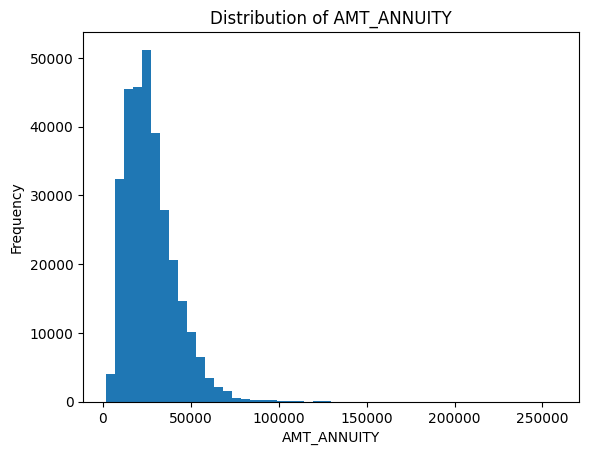

In [1041]:
# design to impuse the missing value by median
plt.figure()
plt.hist(appTrain['AMT_ANNUITY'], bins=50)
plt.title('Distribution of AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.show()

In [1042]:
life = pd.merge(
    life,
    appTrain[['SK_ID_CURR', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_CONTRACT_TYPE']],
    on="SK_ID_CURR",
    how="left"
)
life.shape
life.head()

,SK_ID_CURR,PIT_PD,TARGET,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_CONTRACT_TYPE
0,100002,0.305873,1,1,406597.5,24700.5,Cash loans
1,100003,0.018697,0,0,1293502.5,35698.5,Cash loans
2,100004,0.024359,0,1,135000.0,6750.0,Revolving loans
3,100006,0.063131,0,1,312682.5,29686.5,Cash loans
4,100007,0.094554,0,1,513000.0,21865.5,Cash loans


In [1043]:
e = life['AMT_ANNUITY'].median()
life['AMT_ANNUITY'].fillna(e, inplace=True)

C:\Users\jeant\AppData\Local\Temp\ipykernel_54404\957724105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life['AMT_ANNUITY'].fillna(e, inplace=True)


In [1044]:
display(life['AMT_ANNUITY'].isnull().sum())

np.int64(0)

In [1045]:
life = life.merge(prevAgg, on='SK_ID_CURR', how='left')

In [1046]:
life.head()

,SK_ID_CURR,PIT_PD,TARGET,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_CONTRACT_TYPE,DAYS_LAST_DUE_RECENT,DAYS_TERMINATION_RECENT
0,100002,0.305873,1,1,406597.5,24700.5,Cash loans,-25.0,-17.0
1,100003,0.018697,0,0,1293502.5,35698.5,Cash loans,-536.0,-527.0
2,100004,0.024359,0,1,135000.0,6750.0,Revolving loans,-724.0,-714.0
3,100006,0.063131,0,1,312682.5,29686.5,Cash loans,-151.0,-143.0
4,100007,0.094554,0,1,513000.0,21865.5,Cash loans,-354.0,-347.0


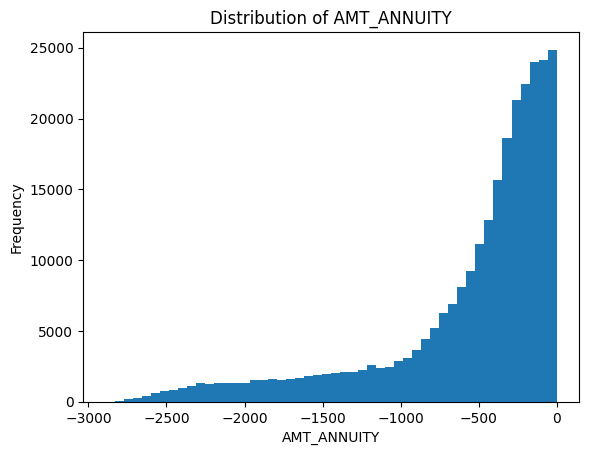

In [1047]:
# design to impuse the missing value by median or mean
plt.figure()
plt.hist(life['DAYS_LAST_DUE_RECENT'], bins=50)
plt.title('Distribution of AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.show()

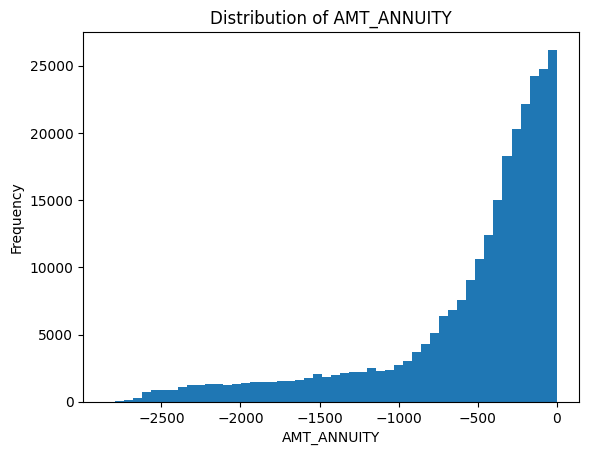

In [1048]:
# design to impuse the missing value by median or mean
plt.figure()
plt.hist(life['DAYS_TERMINATION_RECENT'], bins=50)
plt.title('Distribution of AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.show()

In [1049]:
# I think mean suit in this case and median is better --> I cant tell that a borrower will pay late like the tail of the population
a, b = life['DAYS_LAST_DUE_RECENT'].median(), life['DAYS_TERMINATION_RECENT'].median()
life['DAYS_LAST_DUE_RECENT'].fillna(a, inplace=True), life['DAYS_TERMINATION_RECENT'].fillna(b, inplace=True)

C:\Users\jeant\AppData\Local\Temp\ipykernel_54404\146975435.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life['DAYS_LAST_DUE_RECENT'].fillna(a, inplace=True), life['DAYS_TERMINATION_RECENT'].fillna(b, inplace=True)


(None, None)

In [1050]:
display(life.shape)
display(life.isnull().sum())

(307511, 9)

SK_ID_CURR                 0
PIT_PD                     0
TARGET                     0
FLAG_OWN_REALTY            0
AMT_CREDIT                 0
AMT_ANNUITY                0
NAME_CONTRACT_TYPE         0
DAYS_LAST_DUE_RECENT       0
DAYS_TERMINATION_RECENT    0
dtype: int64

In [1051]:
# by reason of bureau table feature of AMT_ANNUITY have missing value to 71% --> this might not be use
# therefore, I go to get another table data which is previous_applications.csv to compute elapsed months
# by elapsed monthes and AMT_CREDIT / AMT_ANNUITY = TOTAL_TERM_MONTH --> REMAINING_MONTHS
life['ELAPSED'] = abs(life['DAYS_TERMINATION_RECENT']) / 30 # in months unit
life['TOTAL_TERM_MONTH'] = life['AMT_CREDIT'] / life['AMT_ANNUITY']
life['REMAINING_MONTHS'] = life['TOTAL_TERM_MONTH'] - life['ELAPSED']
life.loc[life['REMAINING_MONTHS'] < 0, 'REMAINING_MONTHS'] = 0

In [1052]:
life.head()

,SK_ID_CURR,PIT_PD,TARGET,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_CONTRACT_TYPE,DAYS_LAST_DUE_RECENT,DAYS_TERMINATION_RECENT,ELAPSED,TOTAL_TERM_MONTH,REMAINING_MONTHS
0,100002,0.305873,1,1,406597.5,24700.5,Cash loans,-25.0,-17.0,0.566667,16.461104,15.894437
1,100003,0.018697,0,0,1293502.5,35698.5,Cash loans,-536.0,-527.0,17.566667,36.234085,18.667419
2,100004,0.024359,0,1,135000.0,6750.0,Revolving loans,-724.0,-714.0,23.800000,20.000000,0.000000
3,100006,0.063131,0,1,312682.5,29686.5,Cash loans,-151.0,-143.0,4.766667,10.532818,5.766151
4,100007,0.094554,0,1,513000.0,21865.5,Cash loans,-354.0,-347.0,11.566667,23.461618,11.894951


In [1053]:
life[['SK_ID_CURR', 'PIT_PD', 'TARGET', 'REMAINING_MONTHS', 'FLAG_OWN_REALTY', 'AMT_CREDIT']].head()

,SK_ID_CURR,PIT_PD,TARGET,REMAINING_MONTHS,FLAG_OWN_REALTY,AMT_CREDIT
0,100002,0.305873,1,15.894437,1,406597.5
1,100003,0.018697,0,18.667419,0,1293502.5
2,100004,0.024359,0,0.000000,1,135000.0
3,100006,0.063131,0,5.766151,1,312682.5
4,100007,0.094554,0,11.894951,1,513000.0


In [1054]:
# defind target --> default record
y = life['TARGET']

<span style="font-size:px; font-family:'Times new roman'; font-weight:bold">
Calibrate to TTC PD
</span>

<span style="font-size:15px; font-family:'Times new roman'">
Raw PD = σ(wᵀx) where x are whatever borrower level features If training set spans multiple cycles and<br>
 include no macro/time variables, that σ(wᵀx) will look “averaged” over past cycles, <br>but that’s just coincidence, not a designed TTC calibration<br>
<br>
then what I need to do is to solve the equation 1/N*sum(sata(PDi + c)) == Unconditional long run PD<br>
to find c
<span>

In [1055]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import brentq
import requests
from io import StringIO

In [1056]:
life = life[['SK_ID_CURR', 'PIT_PD', 'TARGET', 'REMAINING_MONTHS', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE']]

In [1057]:
# defind target unconditional --> empirical mean
targetPD = y.mean()

<span style="font-size:15px; font-family:'Times new roman'">
IFRS 9 permits a pure intercept‐shift if you don’t have a time series of PIT PDs. You simply solve for a constant c so that<br>
TTC_PD = long‐run default rate target
<span>


In [1058]:
# precompute logit of each PIT
logit = np.log(life['PIT_PD'] / (1 - life['PIT_PD']))
def meanDiff(c):
    ttc = 1 / (1 + np.exp(-(logit + c)))
    return ttc.mean() - targetPD

c:\Users\jeant\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<span style="font-size:15px; font-family:'Times new roman'">
Why ±10?<br>
- In logit-space, an intercept shift of ±10 is astronomically large (it drives PDs essentially to 0% or 100%),<br>so it almost certainly brackets any realistic solution<br>
-think of it as “give me a very wide window so I don’t miss the root.”<br>
- If I ever get a “root not bracketed” error, simply widen it further, or inspect meanDiff <br>at those endpoints to see why both are the same sign.
<span>

In [1059]:
c = brentq(meanDiff, -10, 10) # what parameter of -10 and 10
life['TTC_PD'] = 1 / (1 + np.exp(-(logit + c)))

In [1060]:
life[['TTC_PD', 'PIT_PD']]

,TTC_PD,PIT_PD
0,0.305873,0.305873
1,0.018697,0.018697
2,0.024359,0.024359
3,0.063131,0.063131
4,0.094554,0.094554
...,...,...
307506,0.087534,0.087534
307507,0.160101,0.160101
307508,0.069906,0.069906
307509,0.027561,0.027561


In [1061]:
life[life['TTC_PD'] != life['PIT_PD']]

,SK_ID_CURR,PIT_PD,TARGET,REMAINING_MONTHS,FLAG_OWN_REALTY,AMT_CREDIT,NAME_CONTRACT_TYPE,TTC_PD
1,100003,0.018697,0,18.667419,0,1293502.5,Cash loans,0.018697
2,100004,0.024359,0,0.000000,1,135000.0,Revolving loans,0.024359
4,100007,0.094554,0,11.894951,1,513000.0,Cash loans,0.094554
5,100008,0.106641,0,15.624857,1,490495.5,Cash loans,0.106641
6,100009,0.009754,0,34.989061,1,1560726.0,Cash loans,0.009754
...,...,...,...,...,...,...,...,...
307504,456248,0.099427,0,20.053965,1,331920.0,Cash loans,0.099427
307505,456249,0.027561,0,0.000000,1,225000.0,Cash loans,0.027561
307506,456251,0.087534,0,8.408992,0,254700.0,Cash loans,0.087534
307509,456254,0.027561,1,7.084261,1,370107.0,Cash loans,0.027561


In [1062]:
# if diff mean = 0.00% then c is essential zero --> PIT = TTC
print(f"Intercept shift c = {c:.20f}")
print(f"Mean PIT PD = {life['PIT_PD'].mean():.4%}")
print(f"Mean TTC PD = {life['TTC_PD'].mean():.4%}")
print("diff mean  = ",
      (life['TTC_PD'].mean() - life['PIT_PD'].mean())*100, "%")

Intercept shift c = -0.00000000000000020110
Mean PIT PD = 8.0729%
Mean TTC PD = 8.0729%
diff mean  =  0.0 %


<span style="font-size:15px; font-family:'Times new roman'">
How to proper defind targetPD for TTC calibration? <br>
I have three options<br>
1. use the proxy default rate from the application train data set which is mean of y --> already use and got the result of same value of PIT and TTC so this method is not proper to use<br>
2. Multi year cohort tracking but not avalable for this dataset<br>
3. and the last one here --> External benchmarks and the best TTC or regulation models (let's try this one)✅✅<br>
<br>
🧠 IFRS 9 / Lifetime PD Note:<br>
In practice, IFRS 9 models often blend:<br>
PIT PD from a model (e.g. logistic regression)<br>
A long-run target PD (historical or external benchmark)<br>
<span>

<span style="font-size:15px; font-family:'Times new roman'">
# How the regulatory (IRB) benchmark method works<br>
1. Regulatory PD input floors<br>
Under Basel’s IRB framework, if a bank’s internal data are too thin to estimate reliable PDs for certain<br> retail buckets, it must apply input floors (minimum one-year PDs) set by the regulator. In the Basel 3.1 standard, for example:<br>
- Residential mortgage exposures: 0.05% minimum PD<br>
assets.kpmg.com<br>
- Qualifying revolving retail exposures (e.g. credit cards): 0.10% minimum PD <br>
bankofengland.co.uk<br>
- Other retail exposures: 0.03% minimum PD (original Basel II floor) <br>
federalreserve.gov<br>
2. Using them as “long-run” anchors<br>
IFRS 9 requires you to measure lifetime expected credit losses on a through-the-cycle, unbiased basis. <br>When you lack a time-series of realized defaults, you can adopt these supervisory floors as proxies for your portfolio’s long-run <br>average PDs in each class.
<br>
3. Portfolio-level target PD<br>
Once each obligor (row) is tagged with its retail sub-class (mortgage / revolving / other),<br> you assign the floor PD. Then you aggregate—typically EAD-weighted—to get a single targetPD that your intercept-shift <br>(or macro­‐adjustment) will match.
<span>

In [1063]:
# target PD should = total default over long cycle / total exposures over that same cycle
# this time I gonna do External benchmarks to find targetPD --> need EAD, LGD, Benchmark PD
# in this data set dont have strate EAD but I can estimate it by EAD = AMT_CREDIT and estimate LGD from Basel/Industry
# secure loan = 30%, Unsecure loan = 80%
life['LGD']= life['FLAG_OWN_REALTY'].map({1:0.3,0:0.8})
life.rename(columns={
    'AMT_CREDIT': 'EAD'
}, inplace=True)
life['FLOOR_PD']= life['NAME_CONTRACT_TYPE'].map({'Cash loans':0.005,'Revolving loans':0.01,'other':0.003})
life = life[['SK_ID_CURR', 'PIT_PD', 'TARGET', 'REMAINING_MONTHS', 'LGD', 'EAD', 'FLOOR_PD']]
life.head()

,SK_ID_CURR,PIT_PD,TARGET,REMAINING_MONTHS,LGD,EAD,FLOOR_PD
0,100002,0.305873,1,15.894437,0.3,406597.5,0.005
1,100003,0.018697,0,18.667419,0.8,1293502.5,0.005
2,100004,0.024359,0,0.000000,0.3,135000.0,0.010
3,100006,0.063131,0,5.766151,0.3,312682.5,0.005
4,100007,0.094554,0,11.894951,0.3,513000.0,0.005


In [1064]:
targetPD = (life['FLOOR_PD'] * life['EAD']).sum() / life['EAD'].sum()
print(f"Portfolio targetPD = {targetPD}")

Portfolio targetPD = 0.005257506993865975


In [1065]:
c = brentq(meanDiff, -10, 10) # what parameter of -10 and 10
life['TTC_PD'] = 1 / (1 + np.exp(-(logit + c)))

In [1066]:
life[['TTC_PD', 'PIT_PD']].head()

,TTC_PD,PIT_PD
0,0.023589,0.305873
1,0.001043,0.018697
2,0.001367,0.024359
3,0.003681,0.063131
4,0.005693,0.094554


In [1067]:
print(f"Intercept shift c = {c:.6f}")
print(f"Mean PIT PD = {life['PIT_PD'].mean():.4%}")
print(f"Mean TTC PD = {life['TTC_PD'].mean():.4%}")
print("diff mean  = ",
      (life['TTC_PD'].mean() - life['PIT_PD'].mean())*100, "%")

Intercept shift c = -2.903639
Mean PIT PD = 8.0729%
Mean TTC PD = 0.5258%
diff mean  =  -7.547131246299898 %


In [1068]:
life['REMAINING_YEARS'] = life['REMAINING_MONTHS']/12

In [1069]:
# all the loan remaining Lifetime are not exceed 4 years --> If i want to calibration PIT PD to Lifetime PD
# I need just 4 years of macro economic features
life['REMAINING_YEARS'].sort_values(ascending=False).head()

237582    3.584143
132470    3.291090
75854     3.290931
285733    3.285031
244001    3.165858
Name: REMAINING_YEARS, dtype: float64

In [1070]:
life['REMAINING_YEARS_INT'] = np.ceil(life['REMAINING_YEARS'])

In [1071]:
life.head()

,SK_ID_CURR,PIT_PD,TARGET,REMAINING_MONTHS,LGD,EAD,FLOOR_PD,TTC_PD,REMAINING_YEARS,REMAINING_YEARS_INT
0,100002,0.305873,1,15.894437,0.3,406597.5,0.005,0.023589,1.324536,2.0
1,100003,0.018697,0,18.667419,0.8,1293502.5,0.005,0.001043,1.555618,2.0
2,100004,0.024359,0,0.000000,0.3,135000.0,0.010,0.001367,0.000000,0.0
3,100006,0.063131,0,5.766151,0.3,312682.5,0.005,0.003681,0.480513,1.0
4,100007,0.094554,0,11.894951,0.3,513000.0,0.005,0.005693,0.991246,1.0


In [1072]:
# lifetime PD calibration
# get macro economic data from 2018 to 2022
def fred(series_id, start, end):
    url = (
      f'https://fred.stlouisfed.org/graph/fredgraph.csv'
      f'?id={series_id}&cosd={start}&coed={end}'
    )
    txt = requests.get(url).text
    df  = pd.read_csv(StringIO(txt), parse_dates=['DATE'], index_col='DATE')
    return df['VALUE']

In [1073]:
# GDP growth, unemployment rate, interest rate, inflation rate --> these are core macro economic features that I think it relevent
# effect the credit default of loans in portfolio
# fetch macro econ data from FRED
from pandas_datareader.data import DataReader
fred = {
    'GDPC1': 'GDP',          # real GDP index
    'UNRATE': 'Unemployment'
}
start, end = '2010-01-01', '2022-12-31'
raw = DataReader(list(fred), 'fred', start, end)
raw.rename(columns=fred, inplace=True)

In [1074]:
raw = raw.dropna()
raw.head()

,GDP,Unemployment
DATE,,
2010-01-01,16582.710,9.8
2010-04-01,16743.162,9.9
2010-07-01,16872.266,9.4
2010-10-01,16960.864,9.4
2011-01-01,16920.632,9.1


In [1075]:
print(raw.columns)
raw = raw.reset_index()
print(raw.columns)

Index(['GDP', 'Unemployment'], dtype='object')
Index(['DATE', 'GDP', 'Unemployment'], dtype='object')


In [1076]:
raw['DATE'] = pd.to_datetime(raw['DATE'])
raw['Year'] = raw['DATE'].dt.year
raw = raw.groupby('Year')[['GDP', 'Unemployment']].mean().reset_index()
raw = raw.iloc[8:,:]
raw

,Year,GDP,Unemployment
8,2018,20193.89525,3.900
9,2019,20715.67150,3.750
10,2020,20267.58475,8.875
11,2021,21494.79825,5.600
12,2022,22034.82875,3.700


In [1077]:
# lifetime PD --> I'll scale each loan’s PIT_PD using macroeconomic indicators
# Lifetime_PD(t) = PIT_PD × Macro_Scaler(t)
raw['MACRO_SCALER'] = (raw['Unemployment'] / raw.iloc[0]['Unemployment']) * (raw.iloc[0]['GDP'] / raw['GDP'])

In [1078]:
def projectLifetimePD(df):
    pit_pd = df['PIT_PD']
    years = int(df['REMAINING_YEARS_INT'])
    scalers = raw['MACRO_SCALER'].iloc[:years].values
    return pit_pd * scalers

In [1079]:
life['Lifetime_PD_YEAR'] = life.apply(projectLifetimePD, axis=1)
life['Avg_Lifetime_PD'] = life['Lifetime_PD_YEAR'].apply(np.mean)
life['Cumulative_Lifetime_PD'] = life['Lifetime_PD_YEAR'].apply(np.sum)

c:\Users\jeant\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jeant\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [1080]:
life.head()

,SK_ID_CURR,PIT_PD,TARGET,REMAINING_MONTHS,LGD,EAD,FLOOR_PD,TTC_PD,REMAINING_YEARS,REMAINING_YEARS_INT,Lifetime_PD_YEAR,Avg_Lifetime_PD,Cumulative_Lifetime_PD
0,100002,0.305873,1,15.894437,0.3,406597.5,0.005,0.023589,1.324536,2.0,"[0.30587337909992374, 0.2867011435738119]",0.296287,0.592575
1,100003,0.018697,0,18.667419,0.8,1293502.5,0.005,0.001043,1.555618,2.0,"[0.018697106868726627, 0.017525166578927803]",0.018111,0.036222
2,100004,0.024359,0,0.000000,0.3,135000.0,0.010,0.001367,0.000000,0.0,[],NaN,0.000000
3,100006,0.063131,0,5.766151,0.3,312682.5,0.005,0.003681,0.480513,1.0,[0.06313088109495298],0.063131,0.063131
4,100007,0.094554,0,11.894951,0.3,513000.0,0.005,0.005693,0.991246,1.0,[0.09455445544554456],0.094554,0.094554


In [1081]:
life['Avg_Lifetime_PD'].fillna(0)

0         0.296287
1         0.018111
2         0.000000
3         0.063131
4         0.094554
            ...   
307506    0.087534
307507    0.000000
307508    0.000000
307509    0.027561
307510    0.094554
Name: Avg_Lifetime_PD, Length: 307511, dtype: float64

<span style="font-size:30px; font-family:'Times new roman'; font-weight:bold">
ECL Calculation 🤩
</span>

<span style="font-size:15px; font-family:'Times new roman'">
Significant Increase in Credit Risk (SICR)
<span>

In [1082]:
# I need to assign the IFRS9 stages each record for ECL calculations
def assignStage(df):
    if df['REMAINING_YEARS_INT'] == 0:
        return 0  # Closed loan — exclude later

    elif df['TARGET'] == 1:
        return 3

    elif df['PIT_PD'] >= 0.20:
        return 2

    else:
        return 1  # Performing

In [1083]:
life['IFRS9_STAGE'] = life.apply(assignStage, axis=1)

In [1084]:
life2 = life[life['REMAINING_YEARS'] > 0]

In [1096]:
dr = 0.045

def ECL(df):
    if df['REMAINING_YEARS'] == 0:
        return 0.0

    ead = df['EAD']
    stage = df['IFRS9_STAGE']
    lgd = df['LGD']
    
    if stage == 1:
        # PIT_PD ECL
        df_1 = 1 / (1 + dr)
        return df['PIT_PD'] * lgd * ead * df_1

    elif stage in [2, 3]:
        # Lifetime ECL
        ecl = 0
        for t, pd_t in enumerate(df['Lifetime_PD_YEAR'], start=1):
            df_t = 1 / ((1 + dr) ** t)
            ecl += pd_t * lgd * ead * df_t
        return ecl

    else:
        return 0.0

In [1097]:
life['ECL'] = life.apply(ECL, axis=1)

In [1098]:
life.head()

,SK_ID_CURR,PIT_PD,TARGET,REMAINING_MONTHS,LGD,EAD,FLOOR_PD,TTC_PD,REMAINING_YEARS,REMAINING_YEARS_INT,Lifetime_PD_YEAR,Avg_Lifetime_PD,Cumulative_Lifetime_PD,IFRS9_STAGE,ECL
0,100002,0.305873,1,15.894437,0.3,406597.5,0.005,0.023589,1.324536,2.0,"[0.30587337909992374, 0.2867011435738119]",0.296287,0.592575,3,67728.078649
1,100003,0.018697,0,18.667419,0.8,1293502.5,0.005,0.001043,1.555618,2.0,"[0.018697106868726627, 0.017525166578927803]",0.018111,0.036222,1,18514.644576
2,100004,0.024359,0,0.000000,0.3,135000.0,0.010,0.001367,0.000000,0.0,[],NaN,0.000000,0,0.000000
3,100006,0.063131,0,5.766151,0.3,312682.5,0.005,0.003681,0.480513,1.0,[0.06313088109495298],0.063131,0.063131,1,5666.963175
4,100007,0.094554,0,11.894951,0.3,513000.0,0.005,0.005693,0.991246,1.0,[0.09455445544554456],0.094554,0.094554,1,13925.292529


In [1100]:
life['ECL'].sum()

np.float64(5568675622.186042)

<span style="font-size:30px; font-family:'Times new roman'; font-weight:bold">
Finally, Portfolio Total ECL = 5,568,675,622 USD 🤩
</span>